Get today's Notebook at: www.eng.mu.edu/ccl/c4c

---
# Thursday: Working with real data

This project will let you practice
*   Data management, lists, loops, and conditional statements
*   plotting with the matplotlib package
*   Basic python structure

---
## Make a copy of this Notebook

- Go to `File > Save a copy in Drive`
  - You may want to change the default name to `your-name-Thursday-project.ipynb`
- Now, follow the instructions and start coding!

## AirWalk: Let's review how was the air outside
Concept Focus: File management, data processing, and plotting

Here is the link for the data we recorded during our AirWalk around the campus: [The sensor data](https://www.eng.mu.edu/ccl/c4c/c4c_airwalk_31Jul2025.xlsx)

This is an `xlsx` file. Open the file in your laptop. See that the file contains many things including time, location, temperature, etc. We will process this data and do some manipulations and plotting.

- First upload the `xlsx` file as we showed earlier.
- Then read the file using `pandas`.
- Then *prepare* the data using the `prepare_data()` function. This data preparation step essentially cleans the data for your project. The `prepare_data()` function requires some advanced `pandas` operation; therefore, we have done that for you! Simply use the function provided.
- Once the data is prepared, display the new clean DataFrame.
- Note that clean DataFrame contains the timestamp broken in three columns (hour, minute, and second)
- There is also a column that lists the elapsed time in seconds from the start of the walk.

For our project, we will be plotting:
* Feels Like Temperature vs. Elapsed Time
* Relative Humidty vs. Elapsed Time
* PM2.5 vs Elapsed Time

*Feels like Temperature*: the feels like temperature is the same as the heat index. For your project:

- Convert the temperature to **Feels Like Temperature**.
Feels like temperature is calculated this way:

*Heat Index*
- Look at your work on Monday's Project.
- Convert the code you wrote on Monday to a function that takes one value of temperature and one value of relative humidty.

*Feels Like Temp Calculation*
- Define a new list or array for feels like temperature
- Loop through every second of data
- Use a conditional statement to check temperature and relative humidty to determine if you need to calculate the heat index to get the feels like temperature.
  - If the `80 <T<112` and `RH>40`, call the heat index function to get the feels like temperature, otherwise just use the temperature.

```markdown
If Tempearture is less than 80 F: Feels Like Temperature = Acutal Temperature
If Relative Humidity is less than 40%: Feels Like Temperature = Acutal Temperature
If Temperature is less than 112 F and greater than 80 F as well as Relative Humidity is greater than 40%: Feels Like Temperature = Heat Index
If Temperature is greater than 112 F: Feels Like Temperature = 135 F
```




In [ ]:
### DO NOT DELETE THIS PORTION

import pandas as pd


def prepare_data(df):
# This function takes a raw sensor DataFrame (df) and cleans it up as needed for the project

  df = df.drop([0,1,2,3,4,5,6,7])
  df = df.dropna()
  new_column_names = ['Index', 'Test', 'Time', 'Lattitude', 'Longitude', 'T[F]', 'PM1[ug/m3]', 'PM10[ug/m3]', 'PM2.5[ug/m3]', 'RH']
  df.columns = new_column_names
  df = df.set_index('Index')
  df = df[[ 'Time', 'Lattitude', 'Longitude', 'T[F]', 'PM1[ug/m3]',
       'PM10[ug/m3]', 'PM2.5[ug/m3]', 'RH']].copy()
  df['Time'] = pd.to_datetime(df['Time'])
  df['Hour'] = df['Time'].dt.hour
  df['Minute'] = df['Time'].dt.minute
  df['Second'] = df['Time'].dt.second

  # Calculate elapsed time in seconds
  start_time = df['Time'].iloc[0]
  df['ElapsedTime[s]'] = (df['Time'] - start_time).dt.total_seconds()

  df = df.set_index('Time')

  return df

---


In [ ]:
# Your code
import pandas as pd

file_path = 'c4c_airwalk_31Jul2025.xlsx'  # Replace with the correct file path
raw_data = pd.read_excel(file_path)

# Prepare the data using the provided function
clean_data = prepare_data(raw_data)

# Display the clean DataFrame
print(clean_data)

                     Lattitude  Longitude T[F] PM1[ug/m3] PM10[ug/m3]  \
Time                                                                    
2025-07-31 10:41:19  43.038649 -87.933283   71         96         215   
2025-07-31 10:41:20  43.038646 -87.933281   71        108         246   
2025-07-31 10:41:21  43.038637 -87.933281   71        108         246   
2025-07-31 10:41:22  43.038626 -87.933288   71        105         239   
2025-07-31 10:41:23  43.038617 -87.933294   71        104         236   
...                        ...        ...  ...        ...         ...   
2025-07-31 11:07:52  43.038491 -87.933286   86         91         201   
2025-07-31 11:07:53  43.038489 -87.933292   86         97         219   
2025-07-31 11:07:54  43.038487 -87.933297   86         96         215   
2025-07-31 11:07:55  43.038485 -87.933302   86         96         215   
2025-07-31 11:07:56  43.038483 -87.933307   86         88         195   

                    PM2.5[ug/m3]  RH  Hour  Minute

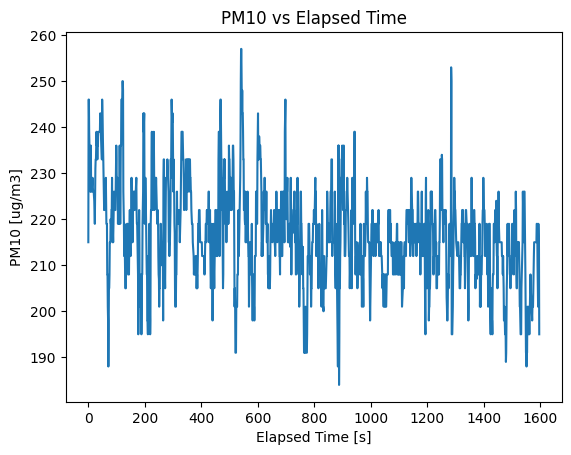

In [ ]:
# PM10 vs. Elapsed Time
import matplotlib.pyplot as plt

elapsed_time = clean_data['ElapsedTime[s]']
pm10 = clean_data['PM10[ug/m3]']

# Plot
plt.plot(elapsed_time, pm10)
plt.xlabel('Elapsed Time [s]')
plt.ylabel('PM10 [ug/m3]')
plt.title('PM10 vs Elapsed Time')
plt.show()


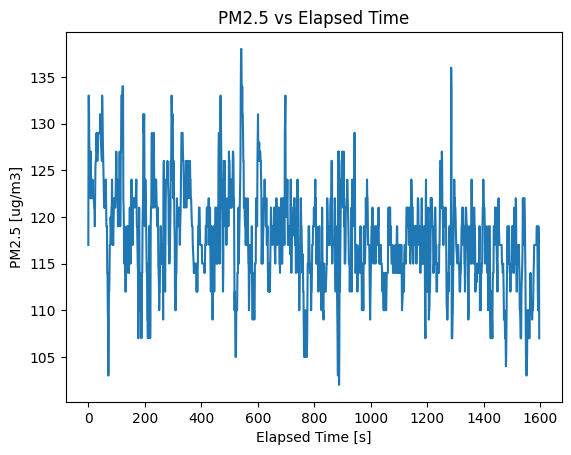

In [ ]:
#PM2.5 vs Elapsed Time
# Plot PM2.5 vs. Elapsed Time
pm25 = clean_data['PM2.5[ug/m3]']

# Plot
plt.plot(elapsed_time, pm25)
plt.xlabel('Elapsed Time [s]')
plt.ylabel('PM2.5 [ug/m3]')
plt.title('PM2.5 vs Elapsed Time')
plt.show()

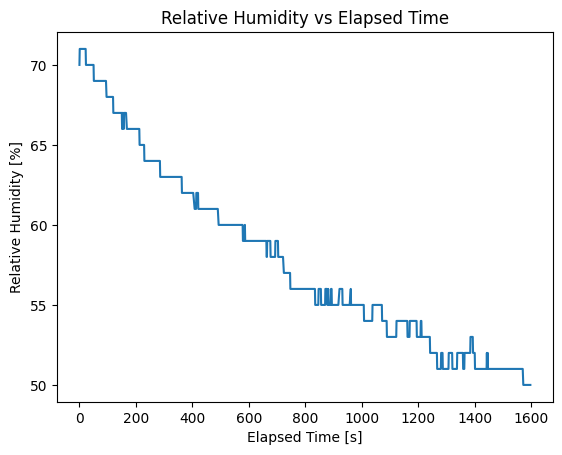

In [ ]:
# Relative Humidity vs. Elapsed Time
rh = clean_data['RH']

# Plot
plt.plot(elapsed_time, rh)
plt.xlabel('Elapsed Time [s]')
plt.ylabel('Relative Humidity [%]')
plt.title('Relative Humidity vs Elapsed Time')
plt.show()

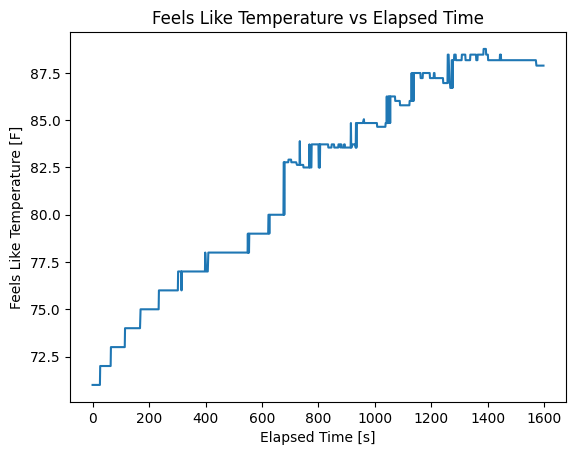

In [ ]:
# Define the heat index function
def calculate_heat_index(temp, rh):
    # heat index calculation
    return -42.379 + 2.04901523 * temp + 10.14333127 * rh - 0.22475541 * temp * rh - 0.00683783 * temp**2 - 0.05481717 * rh**2 + 0.00122874 * temp**2 * rh + 0.00085282 * temp * rh**2 - 0.00000199 * temp**2 * rh**2


# Calculate Feels Like Temperature

feels_like_temp = []
temp = clean_data['T[F]']
rh = clean_data['RH']

feels_like_temp = []

for i in range(len(temp)):
    t = temp.iloc[i]
    r = rh.iloc[i]
    if t > 112:
        feels_like_temp.append(135)
    elif 80 < t < 112 and r > 40:
        feels_like_temp.append(calculate_heat_index(t, r))
    else:
        feels_like_temp.append(t)

clean_data['FeelsLikeTemp[F]'] = feels_like_temp


# Plot Feels Like Temperature vs. Elapsed Time
feels_like_temp = clean_data['FeelsLikeTemp[F]']
plt.plot(elapsed_time, feels_like_temp)
plt.xlabel('Elapsed Time [s]')
plt.ylabel('Feels Like Temperature [F]')
plt.title('Feels Like Temperature vs Elapsed Time')
plt.show()


# AirWalk Visualization


Using this code

1. Upload the data from the air walk into this session
2. Run the block of code
3. The map is saved in the files below the excel file that you previously uploaded.
4. Download the file to your computer by clicking on the options button beside the file
5. Open the file using your browser ( It should open using your browser automatically when you click on it)

In [ ]:
###################################
###################################
##### DON'T CHANGE THIS CODE ######
###################################
###################################


import pandas as pd
import folium
import numpy as np
from folium import plugins

# Load the excel file into a DataFrame
airbeam_data = pd.read_excel('c4c_airwalk_31Jul2025.xlsx')

def prepare_data(df):
    """
    This function takes a raw sensor DataFrame (df) and cleans it up as needed for the project
    """
    df = df.drop([0,1,2,3,4,5,6,7])
    new_column_names = ['Index', 'Test', 'Time', 'Lattitude', 'Longitude', 'T[F]', 'PM1[ug/m3]', 'PM10[ug/m3]', 'PM2.5[ug/m3]', 'RH']
    df.columns = new_column_names
    df = df.set_index('Index')
    df = df[['Time', 'Lattitude', 'Longitude', 'T[F]', 'PM1[ug/m3]',
             'PM10[ug/m3]', 'PM2.5[ug/m3]', 'RH']].copy()
    df['Time'] = pd.to_datetime(df['Time'])
    df['Hour'] = df['Time'].dt.hour
    df['Minute'] = df['Time'].dt.minute
    df['Second'] = df['Time'].dt.second

    # Calculate elapsed time in seconds
    start_time = df['Time'].iloc[0]
    df['ElapsedTime[s]'] = (df['Time'] - start_time).dt.total_seconds()

    df = df.set_index('Time')

    # Convert all numeric columns to numeric, handling any non-numeric values
    numeric_columns = ['Lattitude', 'Longitude', 'T[F]', 'PM1[ug/m3]', 'PM10[ug/m3]', 'PM2.5[ug/m3]', 'RH']
    for col in numeric_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Remove rows with invalid coordinates
    df = df.dropna(subset=['Lattitude', 'Longitude'])

    return df

def get_aqi(data):
    """Calculate AQI for available pollutants and overall AQI"""

    aqi_breakpoints_pm1 = {
        (0, 15): (0, 50),
        (15.1, 40): (51, 100),
        (40.1, 65): (101, 150),
        (65.1, 150): (151, 200),
        (150.1, 250): (201, 300),
        (250.1, 350): (301, 400),
        (350.1, 500): (401, 500)
    }

    aqi_breakpoints_pm25 = {
        (0.0, 9.0): (0, 50),
        (9.1, 35.4): (51, 100),
        (35.5, 55.4): (101, 150),
        (55.5, 125.4): (151, 200),
        (125.5, 225.4): (201, 300),
        (225.5, 325.4): (301, 400),
        (325.5, 500.4): (401, 500)
    }

    aqi_breakpoints_pm10 = {
        (0, 54): (0, 50),
        (55, 154): (51, 100),
        (155, 254): (101, 150),
        (255, 354): (151, 200),
        (355, 424): (201, 300),
        (425, 504): (301, 400),
        (505, 604): (401, 500)
    }

    def calculate_pollutant_aqi(concentration, breakpoints):
        if pd.isna(concentration):
            return None
        for (c_low, c_high), (i_low, i_high) in breakpoints.items():
            if c_low <= concentration <= c_high:
                # Linear interpolation formula
                aqi = ((i_high - i_low) / (c_high - c_low)) * (concentration - c_low) + i_low
                return aqi
        return None

    # Define the pollutants and their corresponding original column names and AQI breakpoints
    pollutant_info = {
        'PM2.5': {'column': 'PM2.5[ug/m3]', 'breakpoints': aqi_breakpoints_pm25},
        'PM10': {'column': 'PM10[ug/m3]', 'breakpoints': aqi_breakpoints_pm10},
        'PM1': {'column': 'PM1[ug/m3]', 'breakpoints': aqi_breakpoints_pm1}
    }

    # Calculate AQI for each pollutant if the column exists in the DataFrame
    calculated_aqi_columns = []
    for pollutant, info in pollutant_info.items():
        original_column = info['column']
        aqi_column_name = f'AQI_{pollutant}'
        if original_column in data.columns:
            data[aqi_column_name] = data[original_column].apply(lambda x: calculate_pollutant_aqi(x, info['breakpoints']))
            calculated_aqi_columns.append(pollutant)

    # Calculate Overall AQI
    def calculate_overall_aqi_row(row, pollutants):
        valid_aqis = [row[f'AQI_{pollutant}'] for pollutant in pollutants
                     if f'AQI_{pollutant}' in row and pd.notna(row[f'AQI_{pollutant}'])]
        if valid_aqis:
            return max(valid_aqis)
        else:
            return None

    data['Overall_AQI'] = data.apply(lambda row: calculate_overall_aqi_row(row, calculated_aqi_columns), axis=1)

    return data

def get_color_for_aqi(aqi_value):
    """
    Color-code AQI values based on standard AQI categories:
    Good (0-50): Green
    Moderate (51-100): Yellow
    Unhealthy for Sensitive Groups (101-150): Orange
    Unhealthy (151-200): Red
    Very Unhealthy (201-300): Purple
    Hazardous (301+): Maroon
    """
    if pd.isna(aqi_value):
        return 'gray'
    elif aqi_value <= 50:
        return 'green'
    elif aqi_value <= 100:
        return 'yellow'
    elif aqi_value <= 150:
        return 'orange'
    elif aqi_value <= 200:
        return 'red'
    elif aqi_value <= 300:
        return 'purple'
    else:
        return 'darkred'

def get_aqi_category_from_value(aqi_value):
    """Get AQI category name for AQI value"""
    if pd.isna(aqi_value):
        return 'No Data'
    elif aqi_value <= 50:
        return 'Good'
    elif aqi_value <= 100:
        return 'Moderate'
    elif aqi_value <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif aqi_value <= 200:
        return 'Unhealthy'
    elif aqi_value <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

def create_aqi_map(processed_data):
    """Create an interactive map with Overall AQI data overlay"""

    # Create a map centered at the mean latitude and longitude
    center_lat = processed_data['Lattitude'].mean()
    center_lon = processed_data['Longitude'].mean()

    # Create the base map
    m = folium.Map(
        location=[center_lat, center_lon],
        zoom_start=13,
        tiles='OpenStreetMap'
    )

    # Add alternative tile layers with proper attribution
    folium.TileLayer(
        tiles='Stamen Terrain',
        attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.',
        name='Stamen Terrain'
    ).add_to(m)

    folium.TileLayer(
        tiles='CartoDB positron',
        attr='&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>',
        name='CartoDB Positron'
    ).add_to(m)

    # Prepare data for heatmap
    heat_data = []

    # Add colored markers for each data point
    for timestamp, row in processed_data.iterrows():
        lat = row['Lattitude']
        lon = row['Longitude']
        overall_aqi = row['Overall_AQI']

        # Skip if coordinates are NaN
        if pd.isna(lat) or pd.isna(lon):
            continue

        # Use overall AQI if available, otherwise skip this point
        if pd.isna(overall_aqi):
            continue

        color = get_color_for_aqi(overall_aqi)
        category = get_aqi_category_from_value(overall_aqi)

        # Create detailed popup text with all available data
        popup_parts = [
            f"<b>Air Quality Reading</b><br>",
            f"Time: {timestamp.strftime('%Y-%m-%d %H:%M:%S')}<br>",
            f"Overall AQI: {overall_aqi:.0f}<br>",
            f"Category: {category}<br>"
        ]

        # Add individual pollutant data if available
        if not pd.isna(row.get('PM2.5[ug/m3]')):
            popup_parts.append(f"PM2.5: {row['PM2.5[ug/m3]']:.1f} μg/m³<br>")
        if not pd.isna(row.get('PM10[ug/m3]')):
            popup_parts.append(f"PM10: {row['PM10[ug/m3]']:.1f} μg/m³<br>")
        if not pd.isna(row.get('PM1[ug/m3]')):
            popup_parts.append(f"PM1: {row['PM1[ug/m3]']:.1f} μg/m³<br>")

        # Add temperature and humidity if available
        if not pd.isna(row.get('T[F]')):
            popup_parts.append(f"Temperature: {row['T[F]']:.1f}°F<br>")
        if not pd.isna(row.get('RH')):
            popup_parts.append(f"Humidity: {row['RH']:.1f}%<br>")

        popup_parts.append(f"Location: {lat:.6f}, {lon:.6f}")
        popup_text = "".join(popup_parts)

        # Add circle marker
        folium.CircleMarker(
            location=[lat, lon],
            radius=6,
            popup=folium.Popup(popup_text, max_width=300),
            color='black',
            weight=1,
            fill=True,
            fillColor=color,
            fillOpacity=0.8,
            tooltip=f'AQI: {overall_aqi:.0f} ({category})'
        ).add_to(m)

        # Add data point for heatmap (lat, lon, weight) - using Overall AQI as weight
        heat_data.append([lat, lon, overall_aqi])

    # Add heatmap layer using Overall AQI
    if heat_data:
        heatmap = plugins.HeatMap(
            heat_data,
            name='Overall AQI Heatmap',
            radius=20,
            blur=15,
            max_zoom=18,
            min_opacity=0.4
        )
        heatmap.add_to(m)

    # Add GPS track line
    if len(processed_data) > 1:
        coordinates = [[row['Lattitude'], row['Longitude']]
                      for _, row in processed_data.iterrows()
                      if not (pd.isna(row['Lattitude']) or pd.isna(row['Longitude']))]

        if coordinates:
            folium.PolyLine(
                coordinates,
                color='blue',
                weight=2,
                opacity=0.8,
                popup='GPS Track'
            ).add_to(m)

    # Add layer control
    folium.LayerControl().add_to(m)

    # Add legend for Overall AQI
    legend_html = '''
    <div style="position: fixed;
                bottom: 50px; left: 50px; width: 200px; height: 180px;
                background-color: white; border:2px solid grey; z-index:9999;
                font-size:14px; padding: 10px">
    <p><b>Overall Air Quality Index</b></p>
    <p><i class="fa fa-circle" style="color:green"></i> Good (0-50)</p>
    <p><i class="fa fa-circle" style="color:yellow"></i> Moderate (51-100)</p>
    <p><i class="fa fa-circle" style="color:orange"></i> Unhealthy for Sensitive (101-150)</p>
    <p><i class="fa fa-circle" style="color:red"></i> Unhealthy (151-200)</p>
    <p><i class="fa fa-circle" style="color:purple"></i> Very Unhealthy (201-300)</p>
    <p><i class="fa fa-circle" style="color:darkred"></i> Hazardous (301+)</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))

    return m

# Process the data
processed_data = prepare_data(airbeam_data)
print("Data processed successfully!")

# Calculate AQI values
processed_data = get_aqi(processed_data)
print("AQI calculations completed!")

print(f"Number of valid data points: {len(processed_data)}")

# Display statistics for available pollutants
if 'PM2.5[ug/m3]' in processed_data.columns:
    print(f"PM2.5 range: {processed_data['PM2.5[ug/m3]'].min():.1f} - {processed_data['PM2.5[ug/m3]'].max():.1f} μg/m³")
if 'Overall_AQI' in processed_data.columns:
    valid_aqi = processed_data['Overall_AQI'].dropna()
    if len(valid_aqi) > 0:
        print(f"Overall AQI range: {valid_aqi.min():.0f} - {valid_aqi.max():.0f}")

# Create the map
map_with_aqi = create_aqi_map(processed_data)

# Display basic statistics
print("\nOverall AQI Statistics:")
if 'Overall_AQI' in processed_data.columns:
    print(processed_data['Overall_AQI'].describe())
else:
    print("No AQI data available")

print("\nTemperature Statistics:")
if 'T[F]' in processed_data.columns:
    print(processed_data['T[F]'].describe())

print("\nHumidity Statistics:")
if 'RH' in processed_data.columns:
    print(processed_data['RH'].describe())

# Save the map
map_with_aqi.save('overall_aqi_gps_map.html')
print("\nMap saved as 'overall_aqi_gps_map.html'")

# Display the map
map_with_aqi